<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Le-format-EXIF-pour-visualiser-les-métadonnées-des-photos-" data-toc-modified-id="-Le-format-EXIF-pour-visualiser-les-métadonnées-des-photos--1"><span class="toc-item-num">1&nbsp;&nbsp;</span> Le format EXIF pour visualiser les métadonnées des photos </a></span></li><li><span><a href="#--Un-test-avec-une-image-du-répertoire-" data-toc-modified-id="--Un-test-avec-une-image-du-répertoire--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>  Un test avec une image du répertoire </a></span></li><li><span><a href="#-Trouver-des-coordonnées-GPS-" data-toc-modified-id="-Trouver-des-coordonnées-GPS--3"><span class="toc-item-num">3&nbsp;&nbsp;</span> Trouver des coordonnées GPS </a></span></li></ul></div>

<h2> Le format EXIF pour visualiser les métadonnées des photos </h2>

In [7]:
# importation de la bibliothèque PIL
import PIL.Image
from matplotlib.pyplot import imshow # pour voir l'image dans la cellule
import numpy as np

Pour réaliser ce TP, vous devez importer vos propres images ou des images libres de droits. Ces images doivent se retrouver dans le même répertoire.

<class 'dict'>


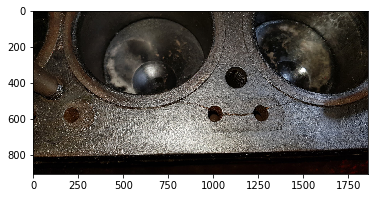

In [8]:
# ouverture de l'image
image = PIL.Image.open('culasse_fendue.jpg') # Attention votre image doit se trouver dans le même répertoire
# Extraction des données Exif stokées dans une variable donneesExif
donneesExif = image._getexif()
print(type(donneesExif)) # Pour voir la structure de données utilisées
imshow(np.array(image))

In [2]:
print(donneesExif)

{305: 'Google', 34665: 46, 36864: b'0220', 37510: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'}


In [13]:
# Dans certains cas, quelques données

print("marque de l'appareil : ",donneesExif[271])
print("type de l'appareil : ",donneesExif[272])
print("sensibilité ISO : ",donneesExif[34855])

marque de l'appareil :  samsung
type de l'appareil :  SM-G950F
sensibilité ISO :  800


<h2>  Un test avec une image du répertoire </h2>

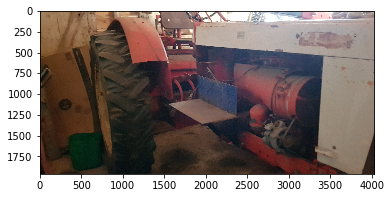

In [12]:
image = PIL.Image.open('tracteur.jpg')
# Extraction des données Exif stokées dans une variable donneesExif
donneesExif = image._getexif()
imshow(np.array(image))

In [14]:
print(donneesExif)

{34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: ((48, 1), (33, 1), (33, 1)), 3: 'E', 4: ((4, 1), (53, 1), (38, 1)), 5: b'\x01', 6: (0, 1), 7: ((15, 1), (36, 1), (2, 1)), 29: '2018:07:01'}, 296: 2, 34665: 214, 271: 'samsung', 272: 'SM-G950F', 305: 'G950FXXU1CRD7', 274: 1, 306: '2018:07:01 17:36:14', 531: 1, 282: (72, 1), 283: (72, 1), 36864: b'0220', 37121: b'\x01\x02\x03\x00', 37377: (332, 100), 36867: '2018:07:01 17:36:14', 36868: '2018:07:01 17:36:14', 37378: (153, 100), 37379: (-328, 100), 37380: (0, 10), 37381: (153, 100), 37383: 2, 37385: 0, 37386: (420, 100), 37510: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 40961: 1, 40962: 4032, 41990: 0, 37520: '0016', 37521: '0016', 37522: '0016', 40963: 1960, 33434: (1, 10), 40965: 852, 33437: (17, 10), 42016: 'F12LLJA00VM F12LLKL01GM\n', 34850: 2, 34855: 800, 41986: 0, 40960: b'0100', 41987: 0, 41989: 26, 37500: b'\x07\x00\x01\x00\x07\x00\x04\x00\x00\x000100\x02\x00\x04\x00\x01\x00\x00\x00\x00 \x01\x00\x0c\x00\x04\x00\x01\x00\x00\

A chaque clef entière du dictionnaire, une information est liée en valeur. 
L'ensemble des relations clef/information est imposé dans le standard Exif 2.3. Si vous voulez découvrir cet ensemble de références, vous pouvez visiter le site suivant, en anglais : https://www.exiv2.org/tags.html
Nous allons nous intéresser à quelques informations :

- le copyright est accessible avec la clé 33432,
- la sensibilité ISO utilisée lors de la prise de vue est accessible avec la clé 34855,
- la marque de l'appareil utilisé est accessible avec la clé 271,
- le type de l'appareil utilisé est accessible avec la clé 272.


Quelques informations sur le dictionnaire infoGPS :

- La clé 1 permet de connaître l'hémisphère : 'N' signifie hémisphère nord et 'S' signifie hémisphère sud.
- La clé 2 permet d'accéder à un tuple contenant la latitude GPS sexagésimale du lieu de la prise de vue ; le premier tuple correspond aux degrés, le deuxième aux minutes et le dernier aux secondes.
- La clé 3 permet de connaître le type de longitude : 'E' signifie longitude Est et 'O' signifie longitude Ouest.
- La clé 4 permet d'accéder à un tuple contenant la longitude GPS sexagésimale du lieu de la prise de vue ; le premier tuple correspond aux degrés, le deuxième aux minutes et le dernier aux secondes.

Attention ! Latitude et longitude sont stockées dans un format fractionnaire : par exemple, le tuple (44, 1) correspond bien au nombre 44 tandis que le tuple (1431,50) correspond au nombre  $\frac{1431}{50}$  soit 28.62.

In [8]:
print("marque de l'appareil : ",donneesExif[271])
print("type de l'appareil : ",donneesExif[272])
print("sensibilité ISO : ",donneesExif[34855])

marque de l'appareil :  samsung
type de l'appareil :  SM-G950F
sensibilité ISO :  800


<h2> Trouver des coordonnées GPS </h2>

In [9]:
infoGPS=donneesExif.get(34853)
print(infoGPS)

{0: b'\x02\x02\x00\x00', 1: 'N', 2: ((48, 1), (33, 1), (33, 1)), 3: 'E', 4: ((4, 1), (53, 1), (38, 1)), 5: b'\x01', 6: (0, 1), 7: ((15, 1), (36, 1), (2, 1)), 29: '2018:07:01'}


In [13]:
def latitudeGPS(dico:dict)->str:
    # Détermination de la latitude sexagésimale avec des nombres en écriture décimale
    latitude=dico.get(2)
    latitudeDeg=latitude[0]
    valeurLatitudeDegre=int(latitudeDeg[0]/latitudeDeg[1])
    latitudeMin=latitude[1]
    valeurLatitudeMin=int(latitudeMin[0]/latitudeMin[1])
    latitudeSec=latitude[2]
    valeurLatitudeSec=latitudeSec[0]/latitudeSec[1]
    # Affichage
    return("{}° {}' {}''".format(valeurLatitudeDegre,valeurLatitudeMin,valeurLatitudeSec))

def longitudeGPS(dico:dict)->str:
    # Détermination de la latitude sexagésimale avec des nombres en écriture décimale
    longitude=dico.get(4)
    longitudeDeg=longitude[0]
    valeurLongitudeDegre=int(longitudeDeg[0]/longitudeDeg[1])
    longitudeMin=longitude[1]
    valeurLongitudeMin=int(longitudeMin[0]/longitudeMin[1])
    longitudeSec=longitude[2]
    valeurLongitudeSec=longitudeSec[0]/longitudeSec[1]
    # Affichage
    return("{}° {}' {}''".format(valeurLongitudeDegre,valeurLongitudeMin,valeurLongitudeSec))




In [14]:
print(latitudeGPS(dico=infoGPS))
print(longitudeGPS(dico=infoGPS))

48° 33' 33.0''
4° 53' 38.0''


Pour voir le lieu sur une carte :
https://www.coordonnees-gps.fr/